## Importing dependencies and setup

In [ ]:
# !pip install tensorflow

In [1]:
!pip install  opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Brotli                       1.0.9
cachetools                   5.3.3
cchardet                     2.1.7
certifi                      2024.2.2
cffi                         1.16.0
chardet                      4.0.0
charset-normalizer           2.0.4
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
d

In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [4]:
# grabbing all the gpus available on our machine
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# tf.config.experimental.set_memory_growth(gpu , true)
# limiting the memory growth

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
# limit tensorflow GPU useage

### Removing dodgy images

In [6]:
import cv2
import imghdr
# imgdhr allows us to check file extensions for particular images

In [7]:
# variable data_dir holds path to our data directory
data_dir = 'data'

In [8]:
# standard list of common image extensions
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

####   os.listdir(data_dir)   # returns all the folders that are inside data_dir
####   os.listdir(os.path.join(data_dir , 'happy'))  # returns every single image inside that folder

In [21]:
# os.listdir(os.path.join(data_dir , 'happy' ))

In [9]:
# just to understand
img = cv2.imread(os.path.join('data' , 'happy' , 'happy-person.jpeg' ))
img.shape
# converts and stores our image into a numpy array

(900, 1350, 3)

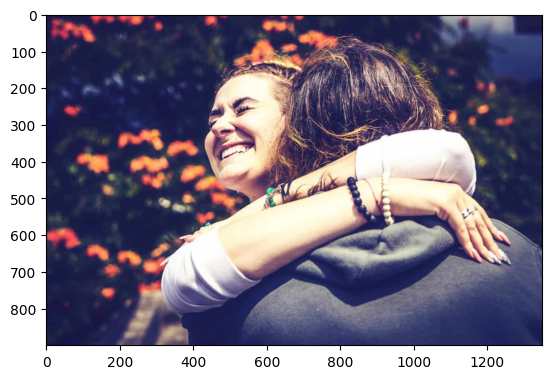

In [10]:
# plt.imshow(img)
# OpenCV reads Images as BGR , matplotlib expects RGB
# so we need to reorder the channel
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

#### Code for removing dodgy images

In [11]:
# looping through every single folder in data directory
for image_class in os.listdir(data_dir):
    # looping through every single image in sub directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # grabing every single image explicitly and storing inside image_path
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)  #load image into OpenCV
            tip = imghdr.what(image_path)  # image matches one of path above
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)  # allows to delete a file
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            # os.remove(image_path)

Issue with imagedata\happy\.ipynb_checkpoints
Issue with imagedata\sad\.ipynb_checkpoints


#### Loading Data

In [ ]:
# tensorflow dataset API allows to build a pipleline , scale , repeatable set of steps

In [12]:
import numpy as np

In [13]:
# keras data pipeline function
data = tf.keras.utils.image_dataset_from_directory('data') # building our data pipeline
# builds a image dataset on the fly - super useful
# no need to build labels or classes , also does some preprocessing

Found 167 files belonging to 3 classes.


In [28]:
# tf.data.Dataset??
# gives documentatin about particular line of code

In [14]:
# Get another batch from our iterator
data_iterator=data.as_numpy_iterator() # access our data pipeline

In [15]:
data_iterator

In [16]:
batch = data_iterator.next()

In [29]:
# Image represented as numpy array
batch[0].shape
# batch size of 32 each

(32, 256, 256, 3)

In [17]:
batch

(array([[[[ 49.48371   ,  54.587227  ,  22.380196  ],
          [ 43.160156  ,  50.101524  ,  18.92381   ],
          [ 30.067772  ,  39.024708  ,  11.832031  ],
          ...,
          [ 17.345703  ,  23.06836   ,  19.484375  ],
          [ 17.820312  ,  21.820312  ,  20.820312  ],
          [ 17.103516  ,  21.103516  ,  20.103516  ]],
 
         [[ 50.26953   ,  56.00387   ,  20.894512  ],
          [ 47.49029   ,  54.234432  ,  20.275448  ],
          [ 34.775105  ,  42.867188  ,  12.720608  ],
          ...,
          [ 19.492283  ,  25.525486  ,  21.009861  ],
          [ 19.33789   ,  23.648438  ,  21.716797  ],
          [ 18.        ,  22.310547  ,  20.378906  ]],
 
         [[ 60.074314  ,  64.47988   ,  25.354881  ],
          [ 55.644436  ,  62.189453  ,  24.515339  ],
          [ 47.278328  ,  53.76075   ,  20.099625  ],
          ...,
          [ 20.349117  ,  27.071774  ,  20.48779   ],
          [ 21.087795  ,  26.087795  ,  22.087795  ],
          [ 18.        ,  23.  

In [18]:
# 1-Happy People
# 2-Sad People
batch[1]

array([1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1])

In [25]:
len(batch)
# there's two part of datset image and label

2

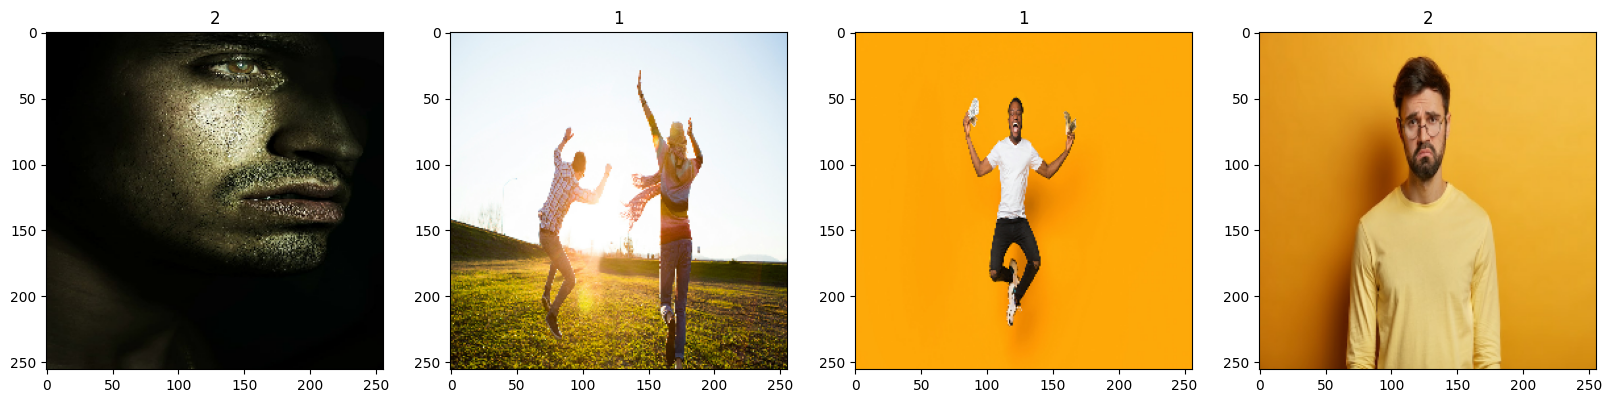

In [54]:
# 
fig,ax = plt.subplots(ncols =4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [56]:
batch[0].min()
batch[0].max()

255.0

In [ ]:
# we need to scale our data between 0 to 1 for faster model 

## 2. Data Preprocessing

#### Scaling

In [57]:
# Maps map_func across the elements of this dataset.

#  This transformation applies map_func to each element of this dataset, and returns a new dataset containing the transformed elements, in the same order as they appeared in the input.

In [ ]:
# here map method allows us to perform transformation in pipeline

In [19]:
data = data.map(lambda x , y:(x/255 , y-1))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[1]

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

#### Split Data

In [23]:
len(data)

6

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [27]:
val_size

1

In [91]:
# take - Creates a Dataset with at most count elements from this dataset.
#skip - Creates a Dataset that skips count elements from this dataset

In [25]:
train = data.take(train_size) # take - how much data we are going to take in a particular partition
val = data.skip(train_size).take(val_size)  #skip - skip the batches that we already allocated
test = data.skip(train_size+val_size).take(test_size)

# Note: IF data is not shuffled than need to shuffle before

In [28]:
len(test)

1

## Building DL Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
# Adding Layers
# 1st Convolution layer , takes input (input layer) , has 16 filters , 3X3 , stride =1 , relu activation
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 12s 1s/step - loss: 1.2286 - accuracy: 0.4688 - val_loss: 0.9928 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 2s 433ms/step - loss: 0.7582 - accuracy: 0.5547 - val_loss: 0.5845 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 2s 392ms/step - loss: 0.6039 - accuracy: 0.6875 - val_loss: 0.6035 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 3s 452ms/step - loss: 0.5365 - accuracy: 0.8438 - val_loss: 0.4256 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 3s 454ms/step - loss: 0.4764 - accuracy: 0.8047 - val_loss: 0.4243 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 2s 428ms/step - loss: 0.4061 - accuracy: 0.8281 - val_loss: 0.2815 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 2s 432ms/step - loss: 0.3534 - accuracy: 0.8750 - val_loss: 0.2829 - val_accuracy: 0.9688
Epoch 8/20
4/4 [======

In [140]:
tf.debugging.set_log_device_placement(True)

### Plot Perfomance

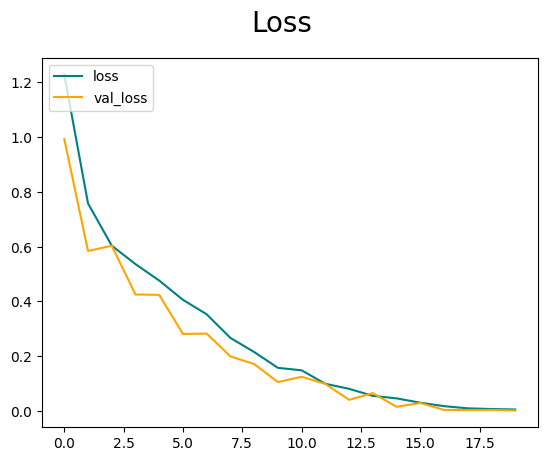

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

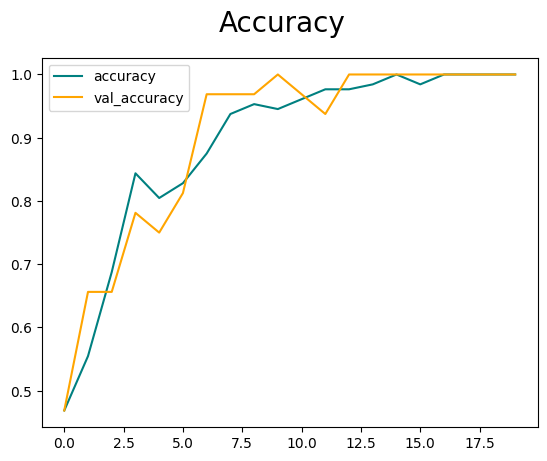

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 643ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### Test

In [43]:
import cv2

In [48]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BG2BGR))
plt.show()

AttributeError: module 'cv2' has no attribute 'COLOR_BG2BGR'

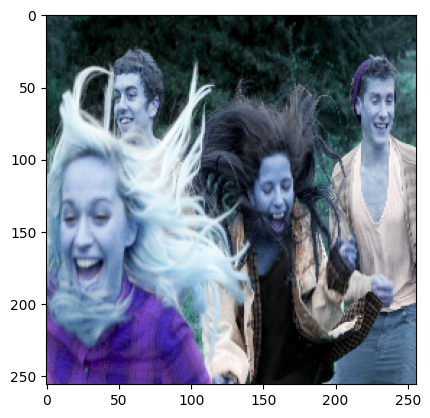

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()